In [62]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline 
import plotly.express as px
import plotly.graph_objs as go

In [23]:
dataset = pd.read_csv('./Data/car_price_prediction_.csv')
df = dataset.copy()

In [24]:
df.drop(["Car ID"], inplace=True, axis=1)

In [25]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [26]:
col = df.columns[7]
col_data = df.pop(col)
df.insert(8, col, col_data)

In [27]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model,Price
0,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X,26613.92
1,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series,14679.61
2,Audi,2013,4.5,Electric,Manual,181601,New,A4,44402.61
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y,86374.33
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang,73577.10


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   object 
 1   Year          2500 non-null   int64  
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   object 
 4   Transmission  2500 non-null   object 
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   object 
 7   Model         2500 non-null   object 
 8   Price         2500 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 175.9+ KB


Top ten cars:

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64


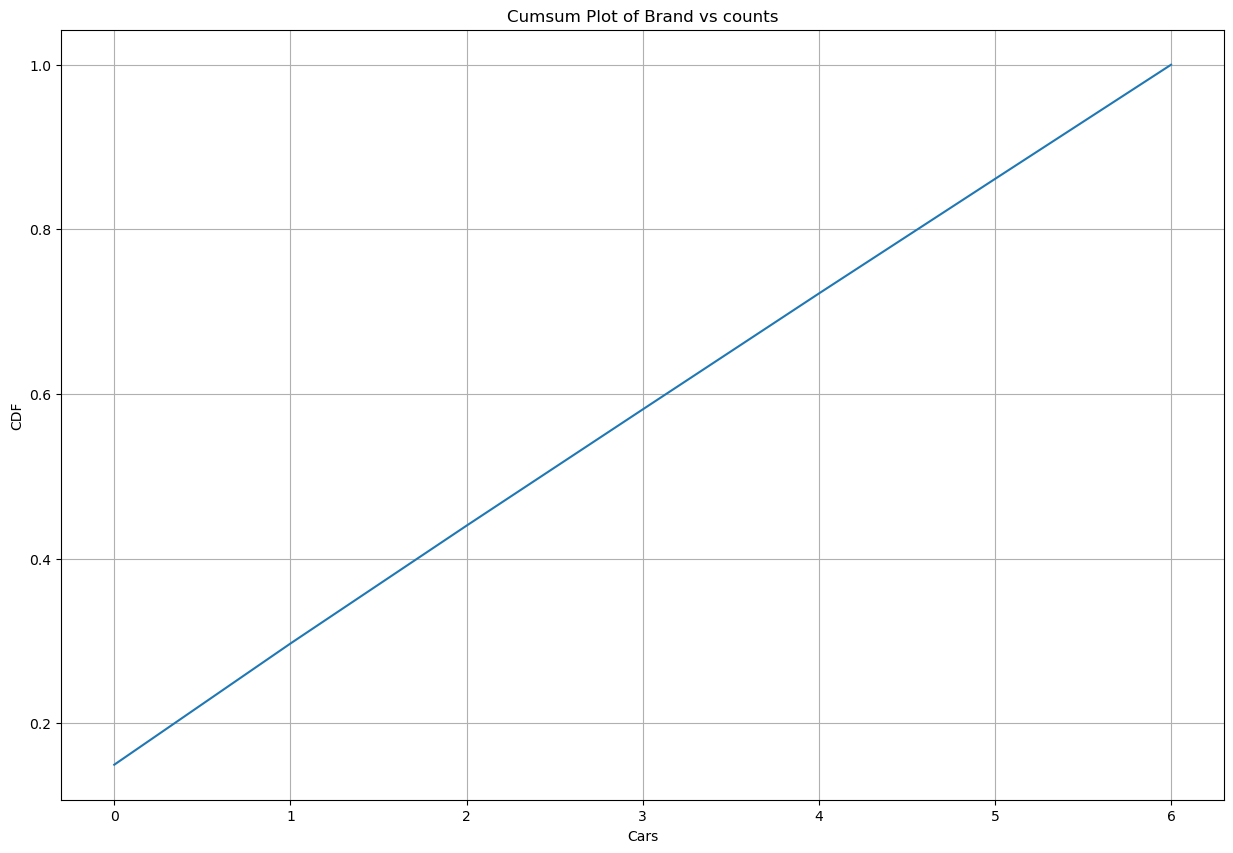

In [39]:
print("Top ten cars:\n")
print(df.Brand.value_counts().head(10))

y = df.Brand.value_counts(normalize=True).cumsum()
x = len(y)

plt.figure(figsize=(15,10))
plt.plot(range(x), y);
plt.title('Cumsum Plot of Brand vs counts')
plt.xlabel('Cars')
plt.ylabel('CDF')
plt.grid(True)

* Just 4 Brands make up 80% and rest occupies only 20%. 

Top ten Models:

Model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
Name: count, dtype: int64


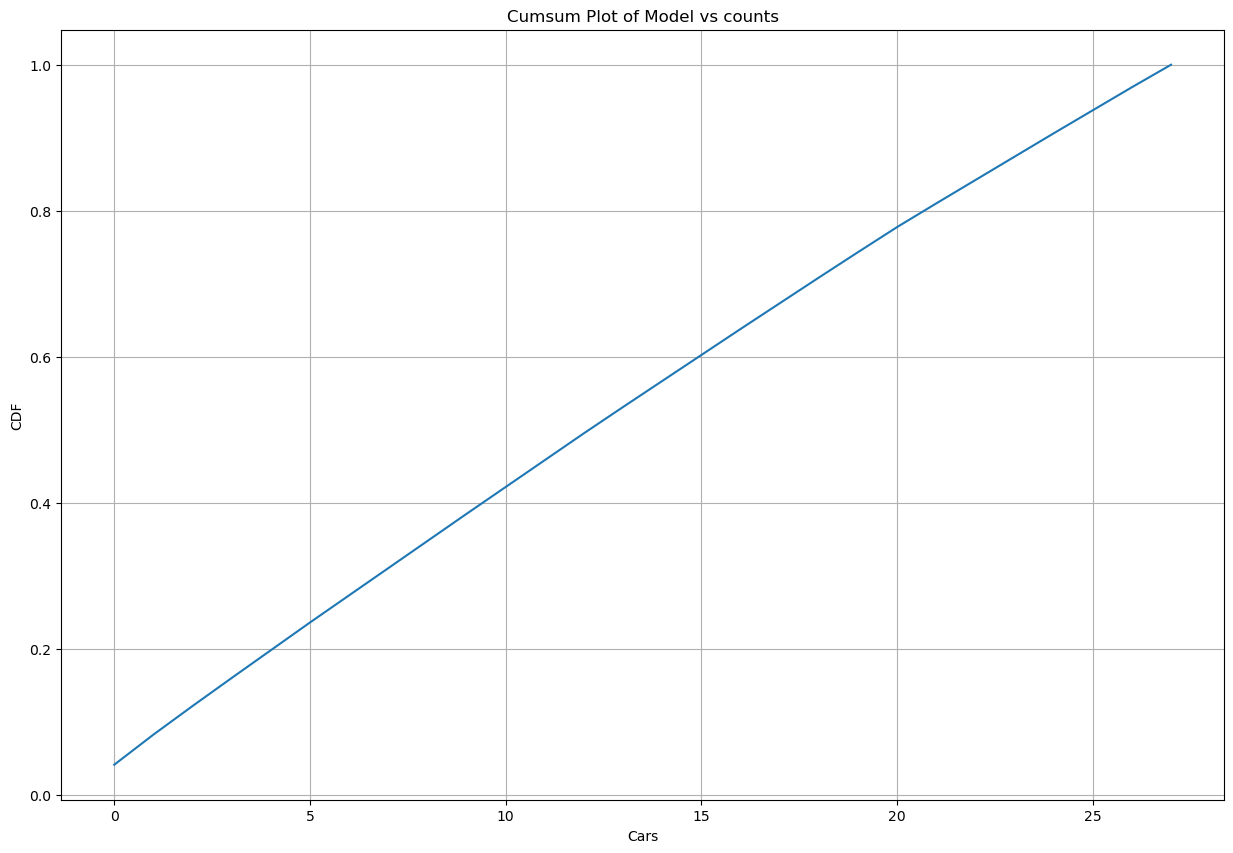

In [38]:
print("Top ten Models:\n")
print(df.Model.value_counts().head(10))

y = df.Model.value_counts(normalize=True).cumsum()
x = len(y)

plt.figure(figsize=(15,10))
plt.plot(range(x), y);
plt.title('Cumsum Plot of Model vs counts')
plt.xlabel('Cars')
plt.ylabel('CDF')
plt.grid(True)

* Roughly, 21 Models make up 80% and rest occupies 20%

## Categorical and ordinal variables

In [41]:
df.columns

Index(['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage',
       'Condition', 'Model', 'Price'],
      dtype='object')

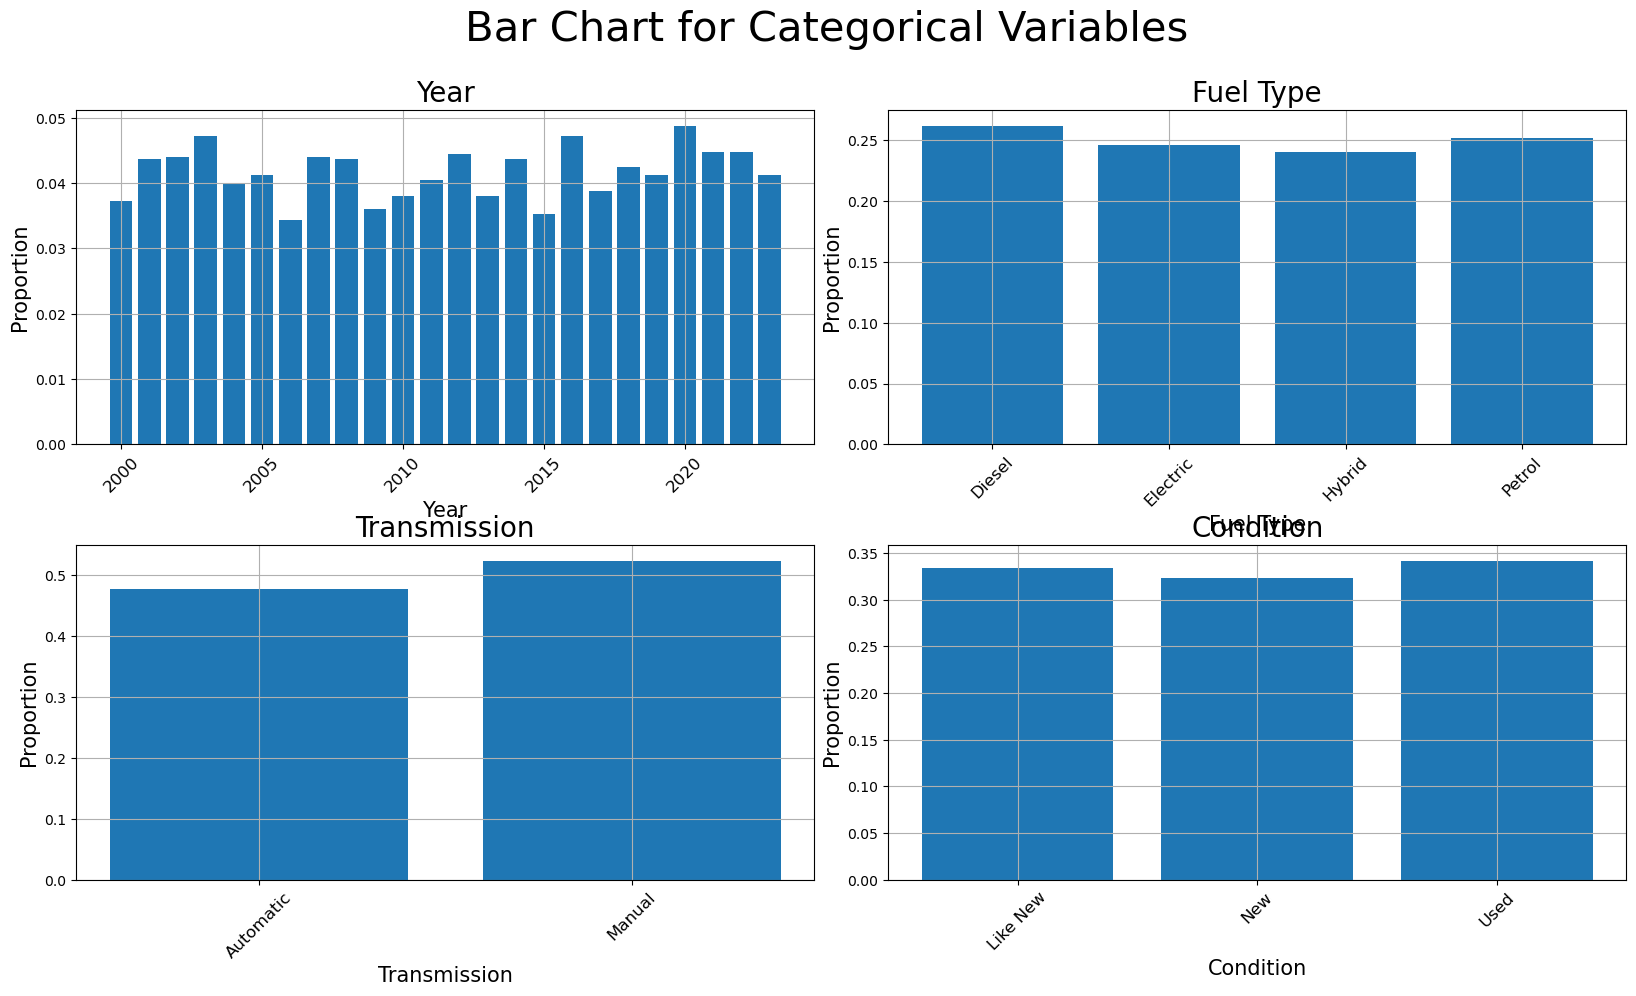

In [49]:
cat_cols = ['Year', 'Fuel Type', 'Transmission', 'Condition']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle("Bar Chart for Categorical Variables", fontsize=30)
axes = axes.ravel()

# Iterate through categorical columns
for i, col in enumerate(cat_cols):
    value_counts = df[col].value_counts(normalize=True, sort=False).sort_index(ascending=True)
    axes[i].bar(value_counts.index, value_counts.values)  # Create bar plot
    axes[i].set_title(col, fontsize=20)
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel('Proportion', fontsize=15)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12) 
    axes[i].grid(True) # Format x-ticks

plt.show()

### Year (Car manufacturing Year)
* The bar chart shows a fairly even distribution across the years, but recent years(e.g., post-2015) appear to have slightly higher propotions. 
* Older cars contributes leass, which makes sense given natural attrition and fewer trades of older
  models. 
* Highest Contribution: Cars manufarctured in recent years(e.g., 2020-2021) are traded more. 
Instead of creating mny dummy variables,we are going to calcualte the age. This transformation will represnt depreciation (Older cars tend to have lower resale values).

### Fuel Type: 
Fuel types like Diesel, Petrol, ELectric, and Hybrid all contribute significantly, but Diesel and Petrol dominate slightly. 
* Electric and Hybrid cars have lower contributes but are growing in popularity.
We will use either one-hot encoding or target mean encoding. 

### Transmission: 
* A nearly equal split between the transmissions. 
* Transmission choice might significantly influence price based on usesr preference. 
* Since there are only two categories, going to use binary encoding. 

### condition: 
* Conditions like "New", "Like New", and "Used" have similiar proportions in the dataset. 

# Continous Variable

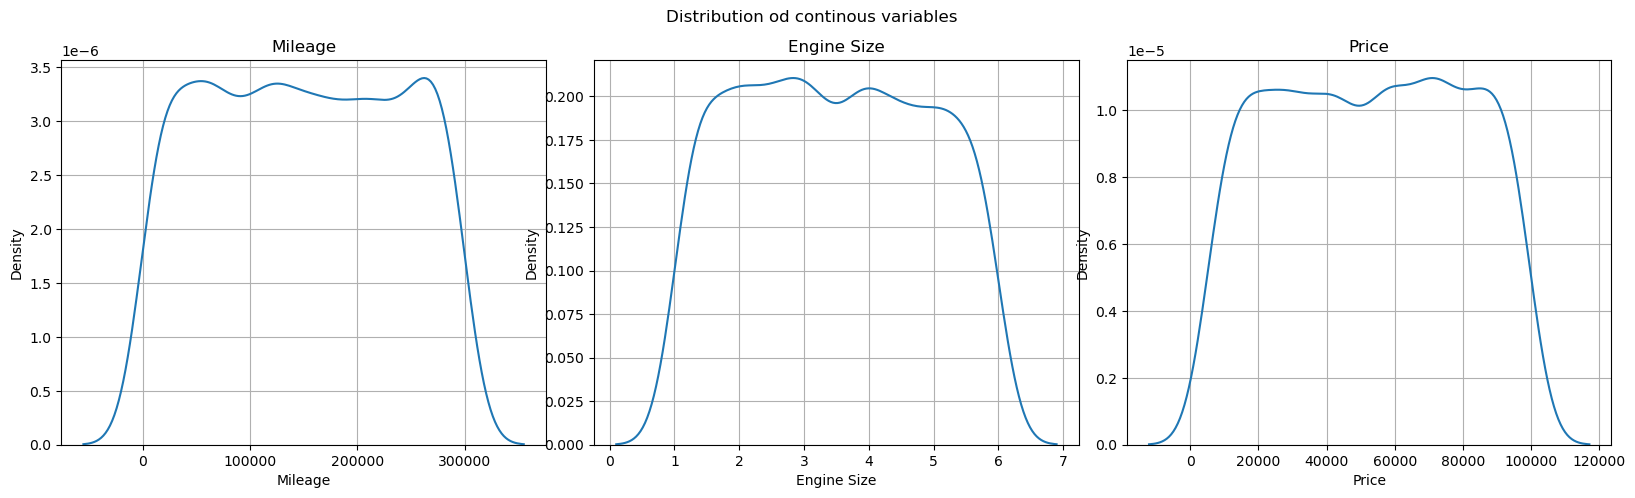

In [61]:
con_col = ['Mileage','Engine Size', 'Price']

fig, axes = plt.subplots(1,3, figsize=(20,5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Distribution od continous variables', fontsize=12)
axes = axes.ravel()

for i,col in enumerate(con_col):
    sns.kdeplot((df[col][~pd.isna(df[col])]), ax = axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].grid(True)
plt.show()

### Mileage
* The distribution appears to be almost uniform, as the density remains consistent across the entire range. 

### Engine Size & Price
* Uniform distributions, no obvious skew or outliers, and evenly represented across their ranges. 


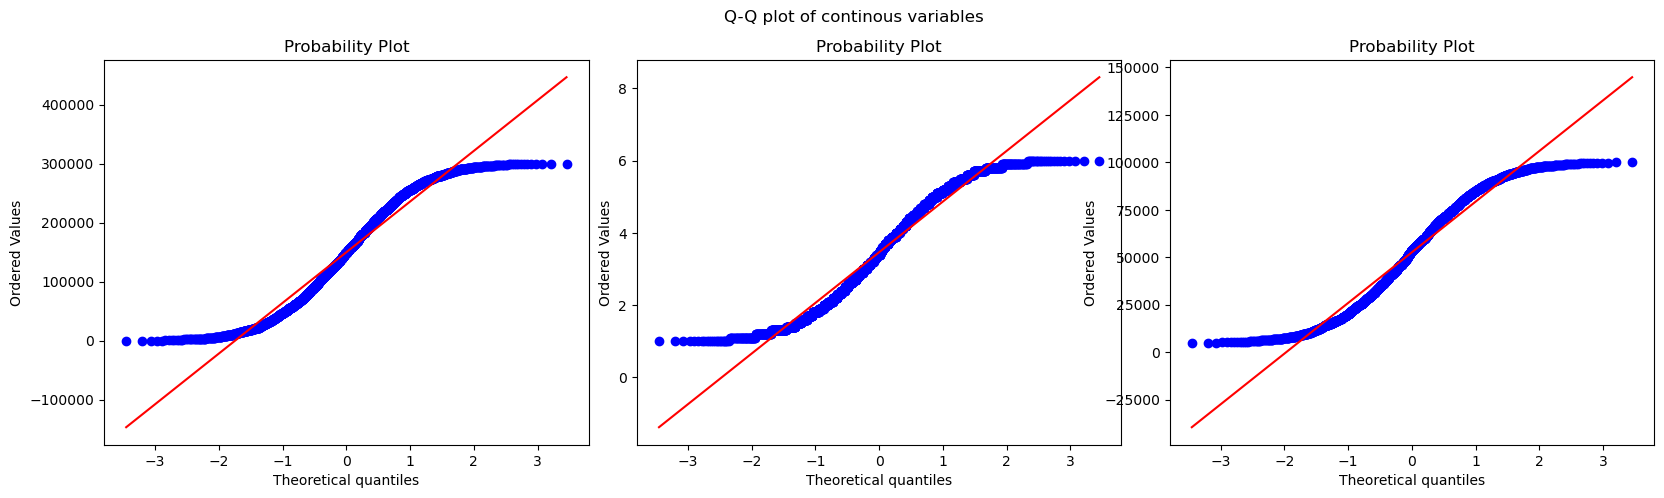

In [65]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Q-Q plot of continous variables', fontsize=12)
axes = axes.ravel()

for i,col in enumerate(con_col):
    res = stats.probplot((df[col][~pd.isna(df[col])]), plot=axes[i])
plt.show()    


* The dataset has a uniform distribution, both the right and left tails are small and the extreme values are falling close to the center. 

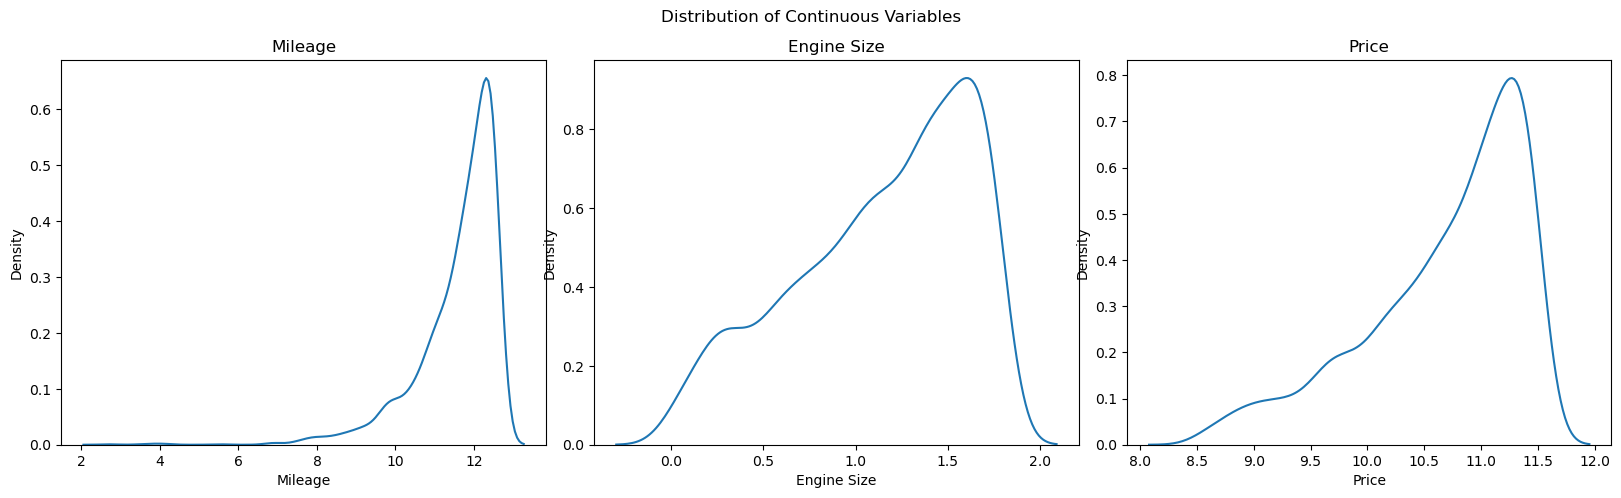

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Distribution of Continuous Variables', fontsize=12)
axes = axes.ravel()

for i, col in enumerate(con_col):
    # Filter out missing values and apply log transformation
    valid_data = df[col].dropna()
    # Ensure there are no zero or negative values before applying log
    valid_data = valid_data[valid_data > 0]
    sns.kdeplot(np.log(valid_data), ax=axes[i])
    axes[i].set_title(col, fontsize=12)

plt.show()

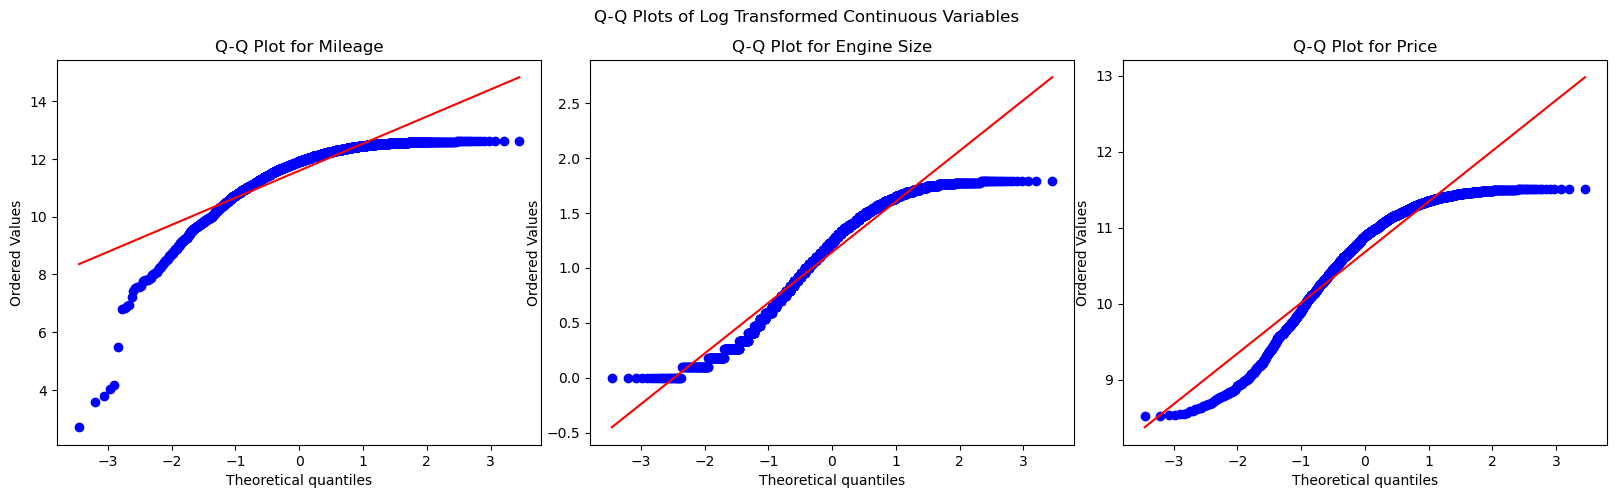

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Q-Q Plots of Log Transformed Continuous Variables', fontsize=12)
axes = axes.ravel()

for i, col in enumerate(con_col):
    # Filter out missing values and apply log transformation
    valid_data = df[col].dropna()
    # Ensure there are no zero or negative values before applying log
    valid_data = valid_data[valid_data > 0]
    
    # Q-Q plot for log-transformed data
    log_transformed = np.log(valid_data)
    stats.probplot(log_transformed, dist="norm", plot=axes[i])
    
    axes[i].set_title(f'Q-Q Plot for {col}', fontsize=12)

plt.show()

# Outlier Detection

Text(0.5, 1.0, 'Box plot of Mileage, Engine Size, Price')

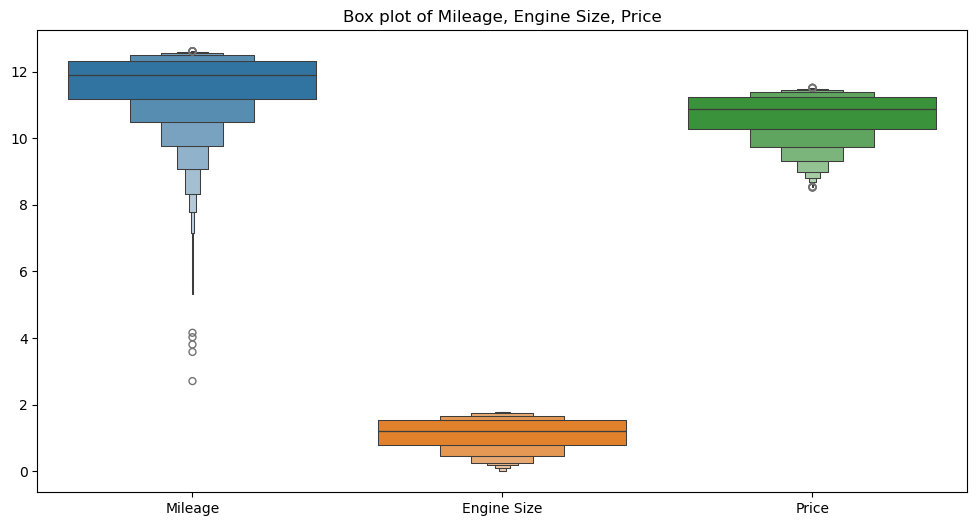

In [82]:
plt.figure(figsize=(12,6))

sns.boxenplot(data=df[con_col].apply(np.log))
plt.title("Box plot of "+", ".join(con_col))

# Bi-variate Analysis

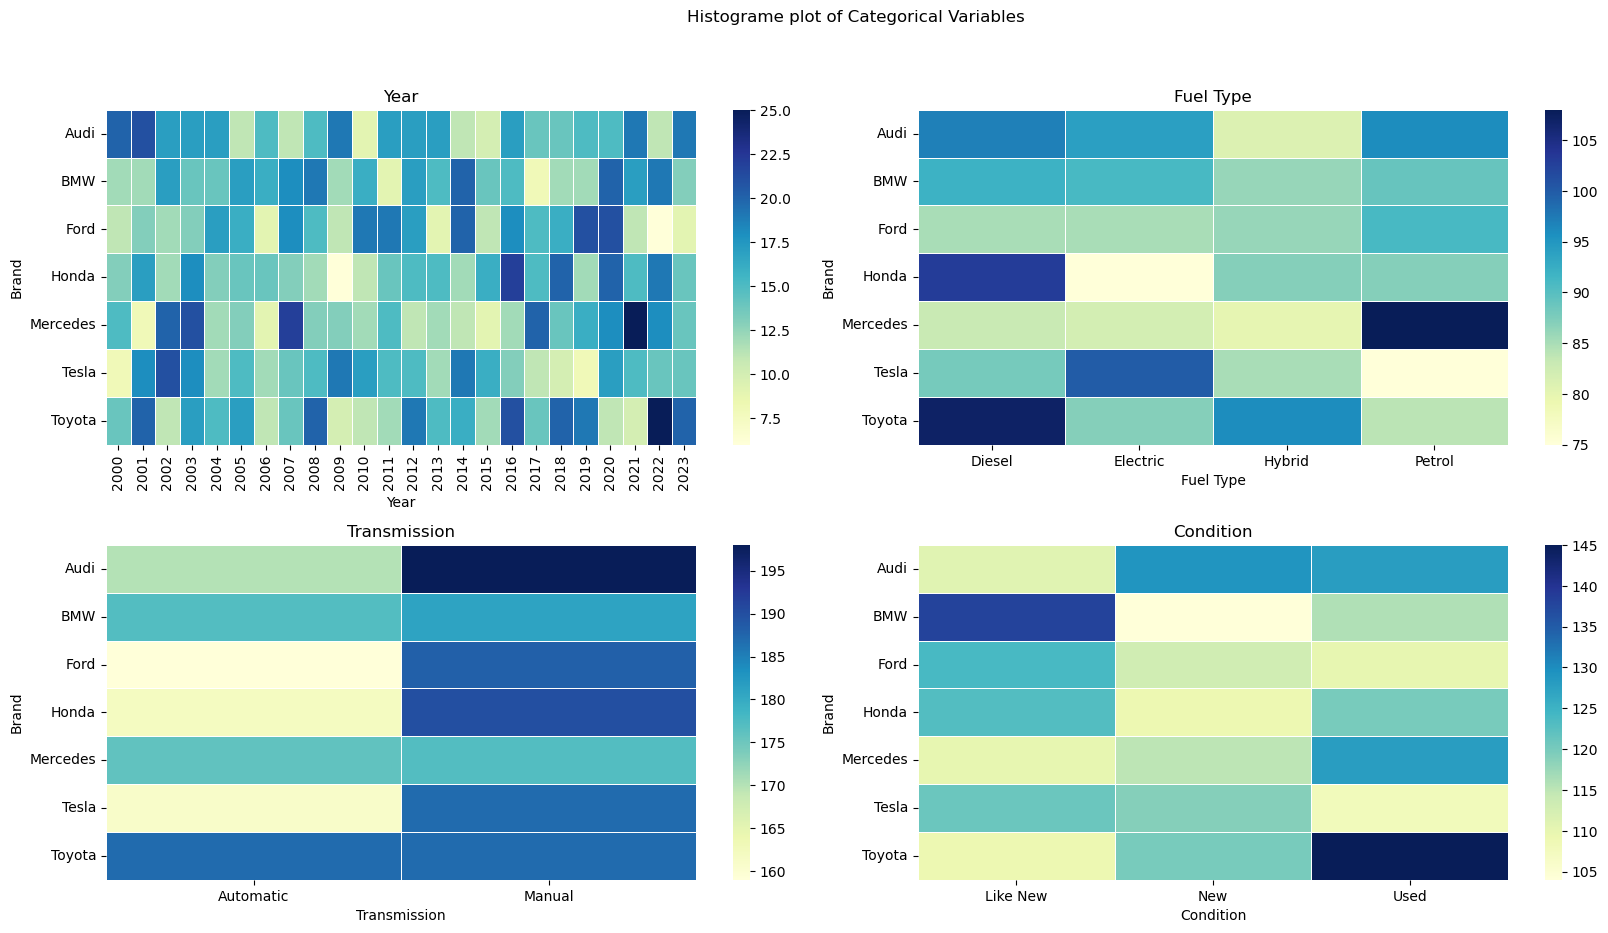

In [85]:
# Brand vs Categorical
fig, axes = plt.subplots(2,2, figsize=(20,10))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Histograme plot of Categorical Variables', fontsize=12)
axes = axes.ravel()

for i,col in enumerate(cat_cols):
    tab = pd.crosstab(index=df.Brand,columns=df[col])
    sns.heatmap(tab,linewidths=0.5,cmap="YlGnBu", ax=axes[i])    
    axes[i].set_title(col, fontsize=12)    #axes[i].set_title(col,fontsize=25)
plt.show()